In [1]:
import numpy as np

VIT_PATH = '/home/maria/ProjectionSort/data/google_vit-base-patch16-224_embeddings_logits.pkl'
NEURAL_PATH = '/home/maria/ProjectionSort/data/hybrid_neural_responses_reduced.npy'
AREAS_PATH = '/home/maria/ProjectionSort/data/brain_area.npy'  


# Load data
vit = np.load(VIT_PATH, allow_pickle=True)['natural_scenes']
R = np.load(NEURAL_PATH).T            # shape: (images, neurons)
areas = np.load(AREAS_PATH, allow_pickle=True)         # shape: (neurons,)

top1 = np.argmax(vit, axis=1)

# Step 2 — ImageNet ordering: 0–397 are animals
image_is_animal = (top1 <= 397).astype(bool)

R_animals = R[image_is_animal==True]
R_inanimate = R[image_is_animal==False]

print(R_animals.shape)

from sklearn.decomposition import PCA

def intrinsic_dim_PCA(X, var=0.95):
    p = PCA().fit(X)
    cumsum = np.cumsum(p.explained_variance_ratio_)
    return np.searchsorted(cumsum, var) + 1

dim_anim = intrinsic_dim_PCA(R_animals)
dim_inan = intrinsic_dim_PCA(R_inanimate)

print("Animal manifold dim:", dim_anim)
print("Inanimate manifold dim:", dim_inan)

(63, 39209)
Animal manifold dim: 55
Inanimate manifold dim: 47


In [3]:
from sklearn.decomposition import PCA
X=R_animals
pca = PCA(n_components=20)
X_reduced = pca.fit_transform(X)

print(X_reduced.shape)


(63, 20)


In [5]:
from sklearn.metrics import pairwise_distances

D = pairwise_distances(X_reduced, metric='euclidean')
print(D.shape)
D

(63, 63)


array([[ 0.        ,  5.85501695, 12.65646953, ..., 10.76774839,
        12.08758965, 10.1410311 ],
       [ 5.85501695,  0.        , 11.48430365, ..., 12.14739069,
        11.99980745, 10.21019176],
       [12.65646953, 11.48430365,  0.        , ..., 12.77333083,
        14.29228778, 14.11682337],
       ...,
       [10.76774839, 12.14739069, 12.77333083, ...,  0.        ,
        14.87143461, 13.03215056],
       [12.08758965, 11.99980745, 14.29228778, ..., 14.87143461,
         0.        , 12.59423662],
       [10.1410311 , 10.21019176, 14.11682337, ..., 13.03215056,
        12.59423662,  0.        ]], shape=(63, 63))

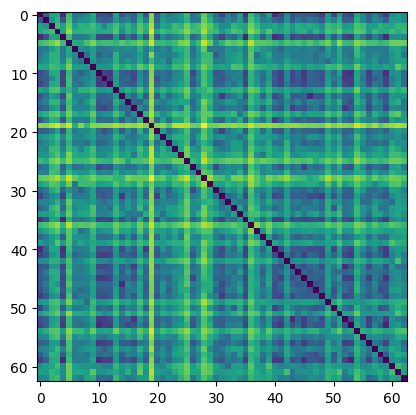

In [7]:
import matplotlib.pyplot as plt
plt.imshow(D)

In [8]:
from sklearn.neighbors import kneighbors_graph

k = 5  # number of neighbors
knn_graph = kneighbors_graph(X_reduced, n_neighbors=k, mode='distance', include_self=False)

print(knn_graph.shape)


(63, 63)


TypeError: Image data of dtype object cannot be converted to float

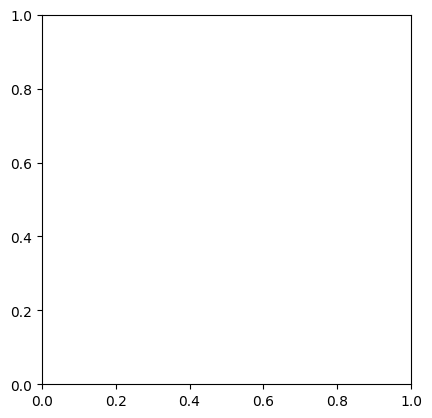